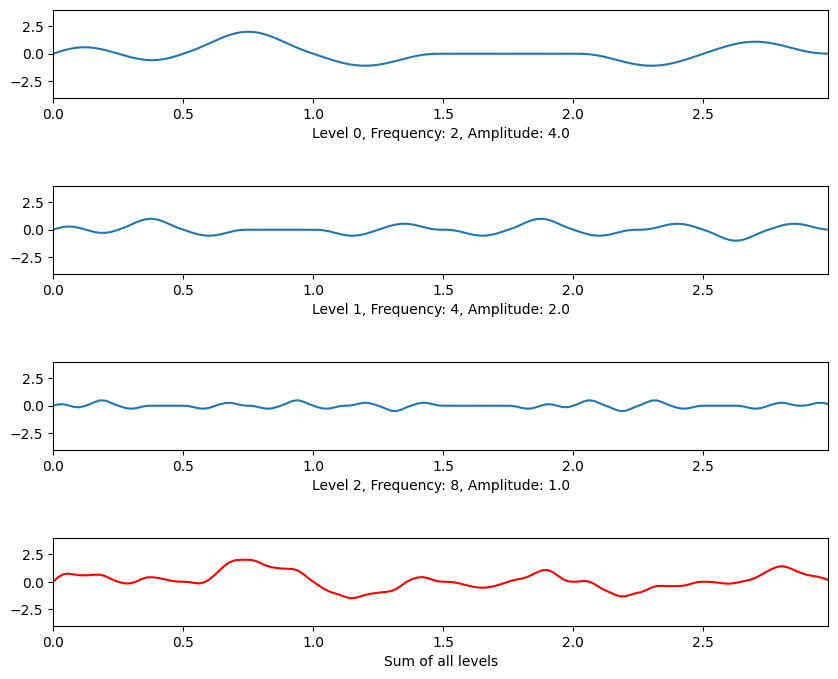

In [78]:
import matplotlib.pyplot as plt
import noise
import numpy as np
# Params
baseFreq= 2
freqGain= 2
baseAmpl= 4
amplShrink= 0.5


lod = 3
segments = lod*50
x = [i/50 for i in range(segments)]
fig, axs = plt.subplots(lod+1, 1, figsize=(10, 8))

result = np.array([0.0 for i in x])
for level in range(lod):
    freq = baseFreq*freqGain**level
    ampl = baseAmpl*amplShrink**level
    
    y = np.array([ ampl*noise.pnoise2(i*freq, 0) for i in x])
    result+=y

    axs[level].set_xlabel(f"Level {level}, Frequency: {round(freq, 2)}, Amplitude: {round(ampl, 2)}")
    axs[level].plot(x, y)
    axs[level].set_xlim(min(x), max(x))
    axs[level].set_ylim(-baseAmpl, baseAmpl)

fig.subplots_adjust(hspace=1.0)

axs[lod].set_xlabel(f"Sum of all levels")
axs[lod].set_xlim(min(x), max(x))
axs[lod].set_ylim(-baseAmpl, baseAmpl)
axs[lod].plot(x, result, color='red')

plt.show()


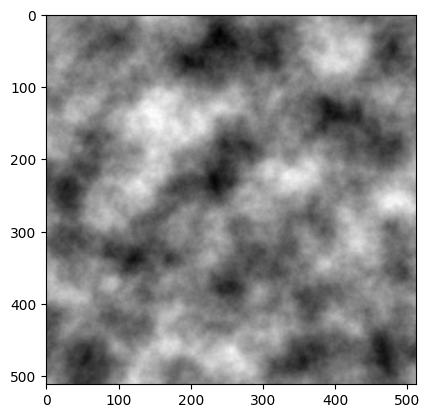

In [79]:
import noise
import numpy as np
import matplotlib.pyplot as plt

# Set the dimensions of the noise grid
width = 512
height = 512

# Set the scale and octaves for the Perlin noise
scale = 100.0
octaves = 6

# Create an empty numpy array to store the noise values
noise_map = np.zeros((height, width))

# Generate Perlin noise values for each pixel in the grid
for y in range(height):
    for x in range(width):
        # Calculate the noise value for the current pixel
        noise_value = noise.pnoise2(x/scale, y/scale, octaves)
        # Store the noise value in the numpy array
        noise_map[y][x] = noise_value

# Display the generated noise map
plt.imshow(noise_map, cmap='gray', interpolation='lanczos')
plt.show()
